# <center>generative AI language model</center>

### Importing Required Libraries

In [25]:
import numpy as np
import pandas as pd
import nltk
import string
import random
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

### Loading Text Data File

In [2]:
data = None
with open("Alice’s Adventures in Wonderland.txt", "r") as f:
    data = f.read()
data

'The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org. If you are not located in the United States, you\nwill have to check the laws of the country where you are located before\nusing this eBook.\n\nTitle: Alice’s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nRelease Date: January, 1991 [eBook #11]\n[Most recently updated: October 12, 2020]\n\nLanguage: English\n\n\nProduced by: Arthur DiBianca and David Widger\n\n*** START OF THE PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***\n\n[Illustration]\n\n\n\n\nAlice’s Adventures in Wonderland\n\nby Lewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\nContents\n\n CHAPTER I.     Down the 

## Data Pre-Processing

### Converting text to lowercase

In [3]:
data = data.lower()

### Removing punctuation

In [4]:
data = "".join([char for char in data if char not in string.punctuation])
print(data)

the project gutenberg ebook of alice’s adventures in wonderland by lewis carroll

this ebook is for the use of anyone anywhere in the united states and
most other parts of the world at no cost and with almost no restrictions
whatsoever you may copy it give it away or reuse it under the terms
of the project gutenberg license included with this ebook or online at
wwwgutenbergorg if you are not located in the united states you
will have to check the laws of the country where you are located before
using this ebook

title alice’s adventures in wonderland

author lewis carroll

release date january 1991 ebook 11
most recently updated october 12 2020

language english


produced by arthur dibianca and david widger

 start of the project gutenberg ebook alice’s adventures in wonderland 

illustration




alice’s adventures in wonderland

by lewis carroll

the millennium fulcrum edition 30

contents

 chapter i     down the rabbithole
 chapter ii    the pool of tears
 chapter iii   a caucusrac

### Generating the sequence of text

In [5]:
def generate_sequence(text):
    length = 40
    sequences = list()
    for i in range(length, len(text)):
        # select sequence of tokens
        seq = text[i - length:i + 1]
        # store
        sequences.append(seq)
    print('Total Sequences: %d' % len(sequences))
    return sequences


# create sequences
sequences = generate_sequence(data)

Total Sequences: 158137


In [6]:
sequences

['the project gutenberg ebook of alice’s ad',
 'he project gutenberg ebook of alice’s adv',
 'e project gutenberg ebook of alice’s adve',
 ' project gutenberg ebook of alice’s adven',
 'project gutenberg ebook of alice’s advent',
 'roject gutenberg ebook of alice’s adventu',
 'oject gutenberg ebook of alice’s adventur',
 'ject gutenberg ebook of alice’s adventure',
 'ect gutenberg ebook of alice’s adventures',
 'ct gutenberg ebook of alice’s adventures ',
 't gutenberg ebook of alice’s adventures i',
 ' gutenberg ebook of alice’s adventures in',
 'gutenberg ebook of alice’s adventures in ',
 'utenberg ebook of alice’s adventures in w',
 'tenberg ebook of alice’s adventures in wo',
 'enberg ebook of alice’s adventures in won',
 'nberg ebook of alice’s adventures in wond',
 'berg ebook of alice’s adventures in wonde',
 'erg ebook of alice’s adventures in wonder',
 'rg ebook of alice’s adventures in wonderl',
 'g ebook of alice’s adventures in wonderla',
 ' ebook of alice’s adventures in 

### Character Encoding

In [7]:
chars = sorted(list(set(data)))
mapping = dict((c, i) for i, c in enumerate(chars))


def encode_char(seq):

    sequences = list()
    for line in seq:
        # integer encode line
        encoded_seq = [mapping[char] for char in line]
        # store
        sequences.append(encoded_seq)
    return sequences


# encode the sequences
sequences = encode_char(sequences)

In [8]:
mapping

{'\n': 0,
 ' ': 1,
 '0': 2,
 '1': 3,
 '2': 4,
 '3': 5,
 '4': 6,
 '5': 7,
 '6': 8,
 '7': 9,
 '8': 10,
 '9': 11,
 'a': 12,
 'b': 13,
 'c': 14,
 'd': 15,
 'e': 16,
 'f': 17,
 'g': 18,
 'h': 19,
 'i': 20,
 'j': 21,
 'k': 22,
 'l': 23,
 'm': 24,
 'n': 25,
 'o': 26,
 'p': 27,
 'q': 28,
 'r': 29,
 's': 30,
 't': 31,
 'u': 32,
 'v': 33,
 'w': 34,
 'x': 35,
 'y': 36,
 'z': 37,
 'ù': 38,
 '—': 39,
 '‘': 40,
 '’': 41,
 '“': 42,
 '”': 43}

In [9]:
sequences

[[31,
  19,
  16,
  1,
  27,
  29,
  26,
  21,
  16,
  14,
  31,
  1,
  18,
  32,
  31,
  16,
  25,
  13,
  16,
  29,
  18,
  1,
  16,
  13,
  26,
  26,
  22,
  1,
  26,
  17,
  1,
  12,
  23,
  20,
  14,
  16,
  41,
  30,
  1,
  12,
  15],
 [19,
  16,
  1,
  27,
  29,
  26,
  21,
  16,
  14,
  31,
  1,
  18,
  32,
  31,
  16,
  25,
  13,
  16,
  29,
  18,
  1,
  16,
  13,
  26,
  26,
  22,
  1,
  26,
  17,
  1,
  12,
  23,
  20,
  14,
  16,
  41,
  30,
  1,
  12,
  15,
  33],
 [16,
  1,
  27,
  29,
  26,
  21,
  16,
  14,
  31,
  1,
  18,
  32,
  31,
  16,
  25,
  13,
  16,
  29,
  18,
  1,
  16,
  13,
  26,
  26,
  22,
  1,
  26,
  17,
  1,
  12,
  23,
  20,
  14,
  16,
  41,
  30,
  1,
  12,
  15,
  33,
  16],
 [1,
  27,
  29,
  26,
  21,
  16,
  14,
  31,
  1,
  18,
  32,
  31,
  16,
  25,
  13,
  16,
  29,
  18,
  1,
  16,
  13,
  26,
  26,
  22,
  1,
  26,
  17,
  1,
  12,
  23,
  20,
  14,
  16,
  41,
  30,
  1,
  12,
  15,
  33,
  16,
  25],
 [27,
  29,
  26,
  21,
  16,
  14,


### Splinting data into Train-Test data

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# vocabulary size
vocab = len(mapping)
sequences = np.array(sequences)
# create X and y
X, y = sequences[:, :-1], sequences[:, -1]
X = np.expand_dims(X, -1)
# one hot encode y
y = to_categorical(y, num_classes=vocab)
# create train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

print('Train shape:', X_train.shape, 'Val shape:', X_test.shape)
print('Train shape:', y_train.shape, 'Val shape:', y_test.shape)

Train shape: (126509, 40, 1) Val shape: (31628, 40, 1)
Train shape: (126509, 44) Val shape: (31628, 44)


In [11]:
X_train

array([[[ 1],
        [20],
        [ 1],
        ...,
        [16],
        [12],
        [25]],

       [[25],
        [22],
        [ 1],
        ...,
        [ 1],
        [20],
        [31]],

       [[32],
        [ 1],
        [30],
        ...,
        [ 0],
        [ 0],
        [ 3]],

       ...,

       [[31],
        [43],
        [ 1],
        ...,
        [23],
        [20],
        [25]],

       [[25],
        [18],
        [ 1],
        ...,
        [ 1],
        [15],
        [16]],

       [[ 0],
        [32],
        [25],
        ...,
        [12],
        [15],
        [ 1]]])

## Model Bulding

In [29]:
model = Sequential()
model.add(LSTM(256, input_shape=(40, 1)))

model.add(Dense(vocab, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 256)               264192    
                                                                 
 dense_7 (Dense)             (None, 44)                11308     
                                                                 
Total params: 275,500
Trainable params: 275,500
Non-trainable params: 0
_________________________________________________________________


In [31]:
opt = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer=opt)
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    batch_size=512,
                    epochs=80)

Epoch 1/80


2023-04-18 21:58:57.061048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-18 21:58:57.167601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  1/248 [..............................] - ETA: 3:52 - loss: 3.7597 - acc: 0.0020

2023-04-18 21:58:57.453720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


248/248 [==============================] - ETA: 0s - loss: 2.6707 - acc: 0.2514

2023-04-18 21:59:06.679312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-18 21:59:06.729169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


248/248 [==============================] - 11s 42ms/step - loss: 2.6707 - acc: 0.2514 - val_loss: 2.5316 - val_acc: 0.2779
Epoch 2/80
248/248 [==============================] - 10s 39ms/step - loss: 2.4286 - acc: 0.3087 - val_loss: 2.3544 - val_acc: 0.3254
Epoch 3/80
248/248 [==============================] - 10s 39ms/step - loss: 2.2853 - acc: 0.3452 - val_loss: 2.2831 - val_acc: 0.3420
Epoch 4/80
248/248 [==============================] - 10s 40ms/step - loss: 2.1926 - acc: 0.3690 - val_loss: 2.1838 - val_acc: 0.3802
Epoch 5/80
248/248 [==============================] - 10s 40ms/step - loss: 2.1102 - acc: 0.3904 - val_loss: 2.0862 - val_acc: 0.4040
Epoch 6/80
248/248 [==============================] - 10s 40ms/step - loss: 2.0393 - acc: 0.4116 - val_loss: 2.0491 - val_acc: 0.4067
Epoch 7/80
248/248 [==============================] - 10s 39ms/step - loss: 1.9887 - acc: 0.4245 - val_loss: 2.0109 - val_acc: 0.4251
Epoch 8/80
248/248 [==============================] - 10s 40ms/step - los

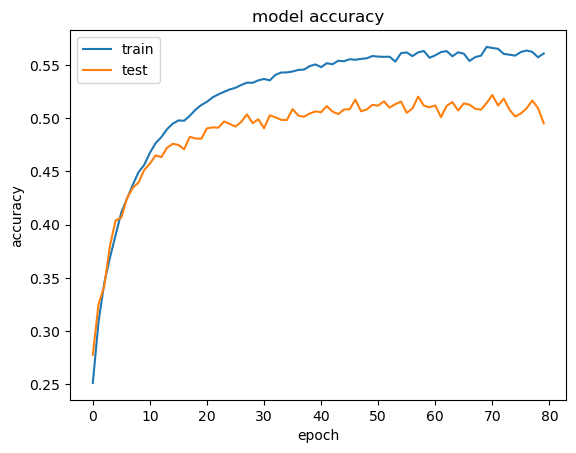

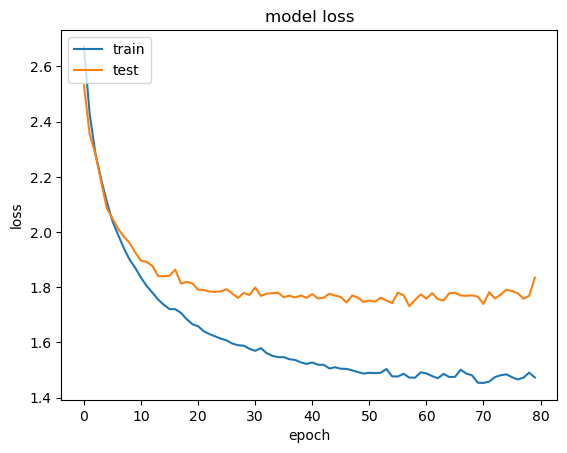

In [32]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Generating text

In [35]:
def generate_text(model, mapping, seq_length, n_chars):
    # Start with a random seed
    max_len = 40
    start_index = random.randint(0, len(data) - max_len - 1)
    generated_text = data[start_index:start_index + max_len]

    in_text = generated_text
    # generate a fixed number of characters
    for _ in range(n_chars):
        # encode the characters as integersabs
        encoded = [mapping[char] for char in in_text]
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')

        encoded = np.expand_dims(encoded, axis=-1)
        # print(encoded)
        # predict character

        predict = model.predict(encoded)
        yhat = np.argmax(predict, axis=1)
        # reverse map integer to character
        out_char = ''
        for char, index in mapping.items():
            if index == yhat:
                out_char = char
                break
        # append to input
        in_text += out_char
    return in_text

In [36]:
generate_text(model, mapping, 40, 200)

' kid gloves\nin one hand and a large fan do and the rueen and the white rabbit as she was a low vith the white rabbit as she was a low vith the white rabbit as she was a low vith the white rabbit as she was a low vith the white rabbit as she'